# Credit Card Fraud Detection

**Objectives**: The aim of this work is to analyse [this dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), train ML models and compare results.

## Dataset Analysis

### Importation

The dataset is in the CSV format which pandas' library can easily read.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("creditcard.csv")

### Columns

The file contains 31 columns from which ```Time``` has no real value, being only a temporal reference of when given transaction was performed, ```Class``` holds the labels, telling us which transactions were fraud (1) or not (0). The other 29 columns are features from which, because of confidentiality issues, ```Amount``` is the only that was not "masked".

In [3]:
feature_columns = list(data.columns[1:])
data = data[feature_columns]
label_column = feature_columns.pop()

print("Original Columns:", ', '.join(list(data.columns)))
print("Number of feature columns:", len(feature_columns))
print("Label columns", label_column)

Original Columns: V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class
Number of feature columns: 29
Label columns Class


In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It is important that the number of null values is 0, otherwise we may not be able to use the whole lines where those  are found.

In [5]:
print("Number of null values:", data.isnull().sum().max())

Number of null values: 0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [7]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Preparation

In [8]:
X = data[feature_columns]
y = data[label_column]

m = len(y)

### Data Balancing

The dataset is not balanced - there are a lot more valid transactions than fraudulent. This is a problem as the classifier would give preference to telling a transaction is valid, as that will give it a good precision percentage.

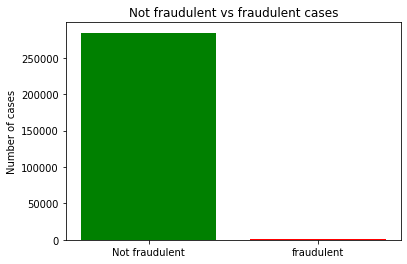

In [9]:
counts = dict(y.value_counts())

tick_label=["Not fraudulent", "fraudulent"]
plt.bar(counts.keys(),counts.values(),tick_label=tick_label,color=['green', 'red'])

plt.ylabel("Number of cases")
plt.title("Not fraudulent vs fraudulent cases")

plt.show()

The problem becomes clear when we use a Naive Classifier for this data, which will just assume every transaction is valid:

In [10]:
def naive_predictor(df):
    TP = df.Class.count() - df.Class.sum()
    FP = df.Class.sum()
    TN = 0
    FN = 0
    
    # TODO: Calculate accuracy, precision and recall
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    recall = TP/(TP+FN)
    precision = TP/(TP+FP)
    
    # TODO: Calculate F-score using the formula above for beta = 1 and correct values for precision and recall.
    fscore = (2*precision*recall)/(precision + recall)
    
    # Print the results 
    print("[Accuracy score: {:.4f}, precision: {:.4f}, recall: {:.4f}, f1-score: {:.4f}]".format(accuracy, precision, recall, fscore))

In [11]:
naive_predictor(data)

[Accuracy score: 0.9983, precision: 0.9983, recall: 1.0000, f1-score: 0.9991]


Those metrics were really impressive, and could mislead into thinking that that is actually a good classifier, when in the real world it would not behave as expected. Therefore, we will randomly discard valid transactions so that the number of valid and fraudulent transactions are equal.

In [12]:
normal = (y==0)
fraud = (y==1)

size = data[fraud].shape[0]
data = pd.concat([data[normal].sample(frac=1)[:size], data[fraud][:size]], ignore_index=True)

In [13]:
X = data[feature_columns]
y = data[label_column]

m = len(y)

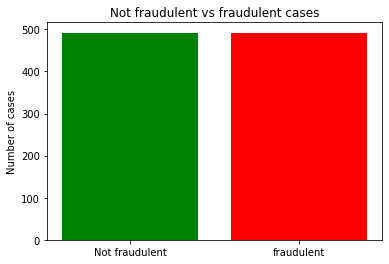

In [14]:
counts = dict(y.value_counts())

tick_label=["Not fraudulent", "fraudulent"]
plt.bar(counts.keys(),counts.values(),tick_label=tick_label,color=['green', 'red'])

plt.ylabel("Number of cases")
plt.title("Not fraudulent vs fraudulent cases")

plt.show()

In [15]:
naive_predictor(data)

[Accuracy score: 0.5000, precision: 0.5000, recall: 1.0000, f1-score: 0.6667]


We can now veriify that a naive classifier can only guess 50% of the entries, as that is the probability of it belonging to either one of the classes.

### Data Normalization

So as to compare features in a fair way we must normalize its values.

In [16]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(X).transform(X)
X = pd.DataFrame(X, columns = feature_columns)

data = pd.concat([X, data[label_column]], axis=1)

## Feature Analysis

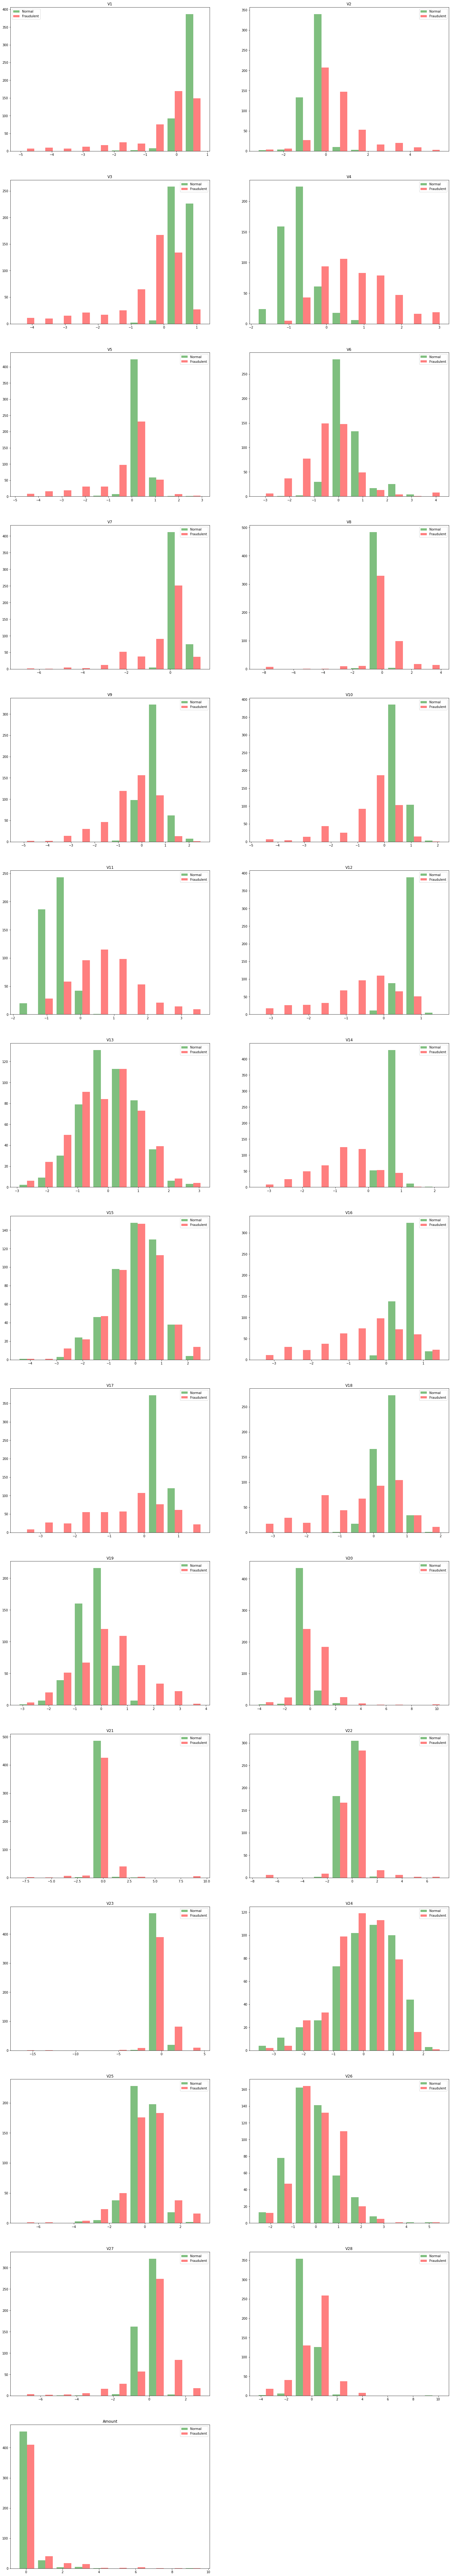

In [17]:
import math

n_cols = 2
n_rows = math.ceil(len(feature_columns) / n_cols)

normal_transactions = X[y == 0]
fraud_transactions = X[y == 1]

plt.figure(1, figsize=(25, n_rows * 10))

for i in range(len(feature_columns)):
    plt.subplot(n_rows, n_cols, i+1)
    feature = feature_columns[i]
    plt.hist([normal_transactions[feature], fraud_transactions[feature]], 10, color=['green', 'red'], alpha=0.5, label=["Normal", "Fraudulent"])
    plt.legend()
    plt.title(feature)
    
plt.show()

By analyzing the behavior of bar charts, we can get a sense of which features and values of a bar chart change more from a normal transaction to a fraudulent one; this can be very useful in understanding which features are more indicative of a fraud.

These are the features: V3,V4,V5,V10,V11,V12,V14,V16,V17,V18,V19

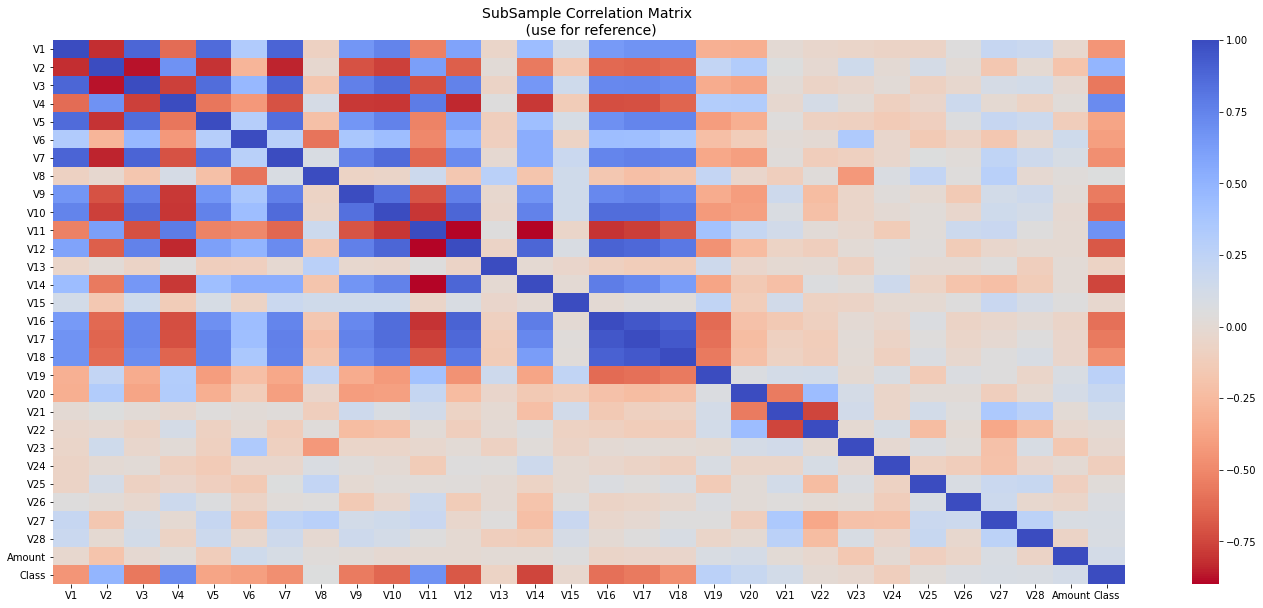

Best features: V3, V4, V9, V10, V11, V12, V14, V16, V17


In [18]:
import seaborn as sns

plt.figure(1, figsize=(24,10))

sub_sample_corr = data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

significance_treshold = .5
best_features = sub_sample_corr['Class'][sub_sample_corr['Class'].abs() > significance_treshold].keys().values[:-1]

print("Best features:", ', '.join(best_features))

Observing the correlation matrix of the original data, in the line of the Class, which is this line that we have to see which features have more weight on it, it is very difficult to conclude which features have more weight on, or better, just the ones negative are those that are easily visible as having the greatest weight.
We can easily conclude not only the negatives but also the positives based on the subSample.
But what are you hoping to achieve with this correlation matrix? Its purpose is to determine which features are closer to the extremes, from which we can conclude which features most easily tell us whether a transaction is fraudulent or not.<br>
The features that are closer to blue have a positive correlation, indicating that the higher the value of this feature, the more likely it is to be a fraudulent transaction, and these are the features: V4 and V11.
The features that are closer to red have a negative correlation, indicating that the lower this value is, the more likely the transaction is to be fraudulent, and they are as follows: V3, V9, V10, V12, V16 and V17 are the most significant examples.

In conclusion, the features that were identified in both cases as the greatest indicators of fraud were: V3, V4, V9, V10, V11, V12, V14, V16, V17

Now let's analyze the boxplots of these features that were considered most important to study.<br>
A boxplot is a standard way of representing the distribution of data based on 5 numbers:Q1( first quadril), minimin, median,Q3 ( third quadril) and maximum <br>
With this we can see the outliners we have and what their values are. We can also see how symmetric the data is or how they are grouped together and how our data is skewed
A boxplot is a plot that shows how the values in the data are spread. While box plots may appear unsophisticated when compared to a histogram or density plot, they have the advantage of taking up less area, which is beneficial for comparing distributions over numerous groups or sets of data.

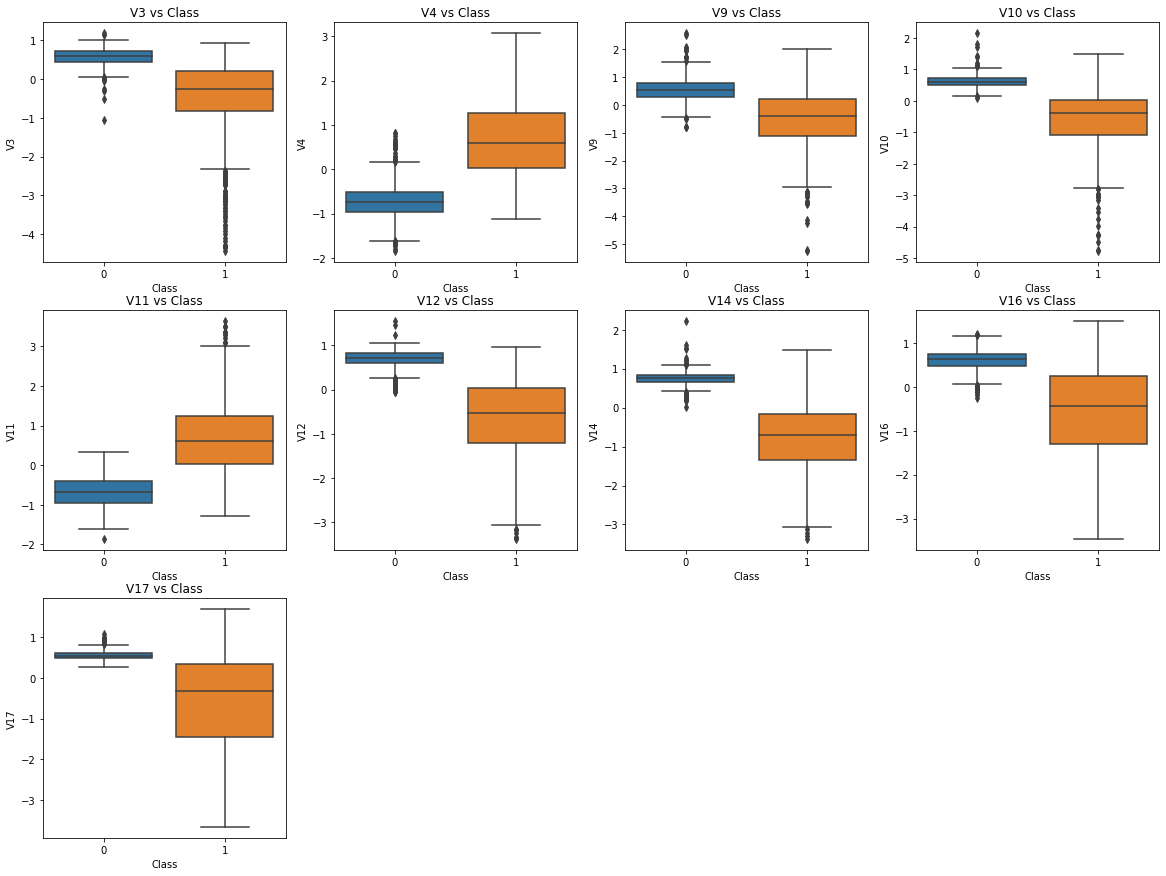

In [19]:
nrows = 4
ncols = math.ceil(len(best_features)/nrows)

f, axes = plt.subplots(ncols, nrows, figsize=(5*nrows, 5*ncols))

for i in range(len(best_features)):
    ax = axes[math.floor(i/nrows)][i%nrows]
    sns.boxplot(x=data["Class"],y=X[best_features[i]],ax=ax)
    ax.set_title(best_features[i] + " vs Class")
    
for n in range(nrows-i%nrows-1):
    f.delaxes(axes[math.floor(i/nrows)][i%nrows+n+1])

plt.show()

Because some values are "outliers," they must be removed, and the boxplot must be repeated to re-analyze the values obtained.
The features where these values essentially exist are in V2, V19 and V10

In [20]:
def outlier_removal(data,feature, value):
    array = data[feature].loc[data['Class'] == value].values 
    q1, q3 = np.percentile(array, 25), np.percentile(array,75)
    iqr = q3 - q1
    cutoff = iqr*1.5
    lower_threshold = q1 - cutoff
    upper_threshold = q3 + cutoff
    outliers = [a for a in array if a < lower_threshold or a > upper_threshold]
    df = data.drop(data[(data[feature] > upper_threshold) | (data[feature] < lower_threshold)].index)
    return df

def remove_outlier(feature, axes):
    data_outlier_feature_V2 = outlier_removal(data,feature,1)
    data_outlier_feature_V2 = outlier_removal(data_outlier_feature_V2,feature,0)

    sns.boxplot(x=data["Class"], y=data[feature], ax=axes[0])
    sns.boxplot(x=data_outlier_feature_V2["Class"], y=data_outlier_feature_V2[feature], ax=axes[1])

    axes[0].set_title(feature + " vs Class")
    axes[1].set_title(feature + " vs Class OUTLIER")

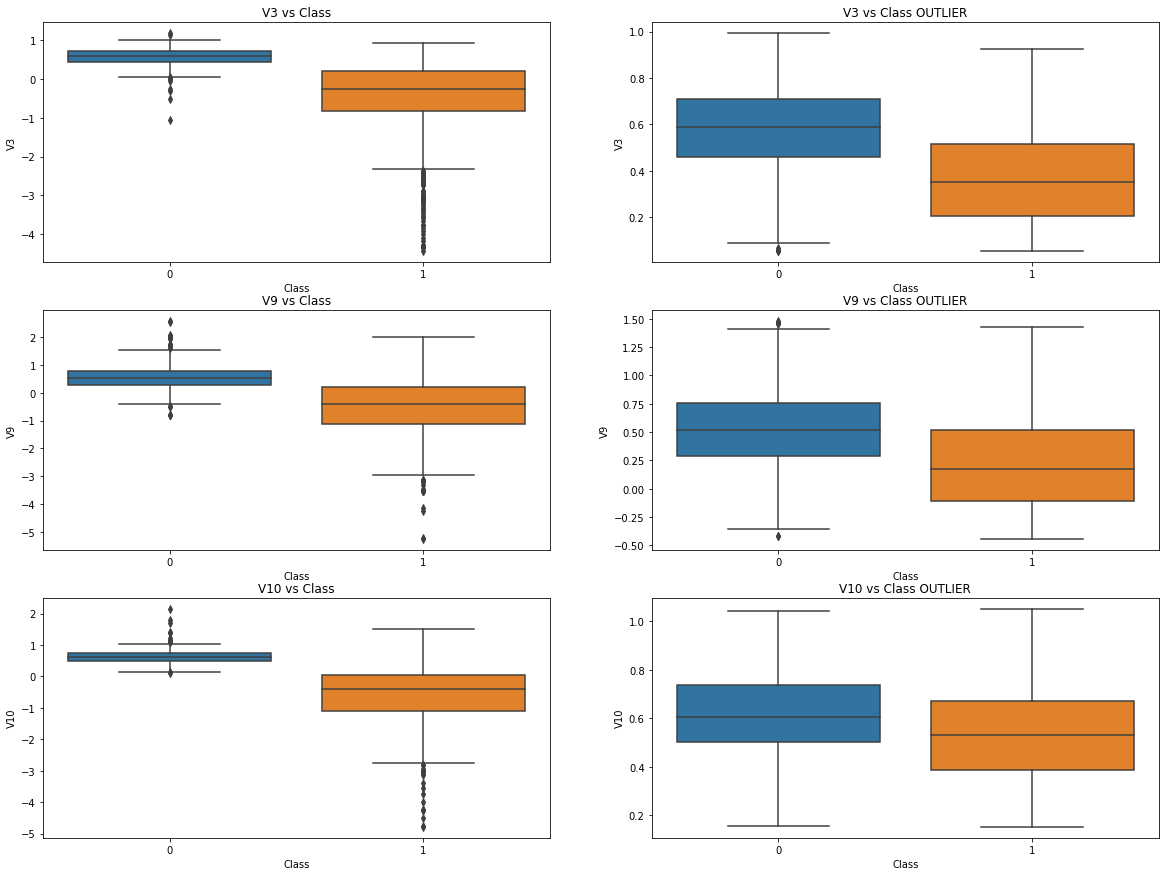

In [21]:
outlier_features = ['V3', 'V9', 'V10']

ncols = 2
nrows = len(outlier_features)

f, axes = plt.subplots(nrows, ncols, figsize=(10*ncols, 5*nrows))

for i in range(nrows):
    remove_outlier(outlier_features[i], axes[i, :])

## Trainning and Comparing Models

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve, ShuffleSplit


def compare_classifiers (clfs, X, y):
    
    fig, axes = plt.subplots(4, len(clfs), figsize=(5*len(clfs), 20))

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

    for i in range(len(clfs)):
        ax = axes[:, i]
        clf = clfs[i]
        
        clf_name = clf.__class__.__name__

        clf.fit(X_train, y_train)

        print(clf_name)
        
        y_pred_train = clf.predict(X_train)
        acc_train = sum(y_train == y_pred_train) / float(len(y_pred_train))
        f1_train = f1_score(y_train, y_pred_train, average='weighted')
        print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1_train , acc_train))

        y_pred_test = clf.predict(X_test)
        acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
        f1_test = f1_score(y_test, y_pred_test, average='weighted')

        print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))
        
        print("Precision score: {:.4f}.".format(precision_score(y_test, y_pred_test)))
        print("Recall score: {:.4f}.".format(recall_score(y_test, y_pred_test)))
        
        print()

        plot_confusion_matrix(clf, X_test, y_test, ax=ax[0])
        ax[0].set_title(clf_name)

        cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(clf, X, y, cv=cv, n_jobs=4, return_times=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

        ax[1].grid()
        ax[1].set_ylim(*np.linspace(0.1, 1.0, 1))
        ax[1].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
        ax[1].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
        ax[1].set_title("Learning Curves ({})".format(clf_name))
        ax[1].set_xlabel("Training examples")
        ax[1].set_ylabel("Score")
        ax[1].legend(loc="best")


        ax[2].grid()
        ax[2].plot(train_sizes, fit_times_mean, "o-")
        ax[2].set_xlabel("Training examples")
        ax[2].set_ylabel("fit_times")
        ax[2].set_title("Scalability of the model")

        fit_time_argsort = fit_times_mean.argsort()
        fit_time_sorted = fit_times_mean[fit_time_argsort]
        test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
        test_scores_std_sorted = test_scores_std[fit_time_argsort]

        ax[3].grid()
        ax[3].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
        ax[3].set_xlabel("fit_times")
        ax[3].set_ylabel("Score")
        ax[3].set_title("Performance of the model")


### Whole Data

LogisticRegression
F1 score and accuracy score for training set: 0.9688 , 0.9688.
F1 score and accuracy score for test set: 0.9186 , 0.9187.
Precision score: 0.9558.
Recall score: 0.8780.

LogisticRegression
F1 score and accuracy score for training set: 0.9797 , 0.9797.
F1 score and accuracy score for test set: 0.9105 , 0.9106.
Precision score: 0.9244.
Recall score: 0.8943.

SVC
F1 score and accuracy score for training set: 0.9593 , 0.9593.
F1 score and accuracy score for test set: 0.9226 , 0.9228.
Precision score: 0.9643.
Recall score: 0.8780.

MLPClassifier
F1 score and accuracy score for training set: 0.9986 , 0.9986.
F1 score and accuracy score for test set: 0.9106 , 0.9106.
Precision score: 0.9174.
Recall score: 0.9024.



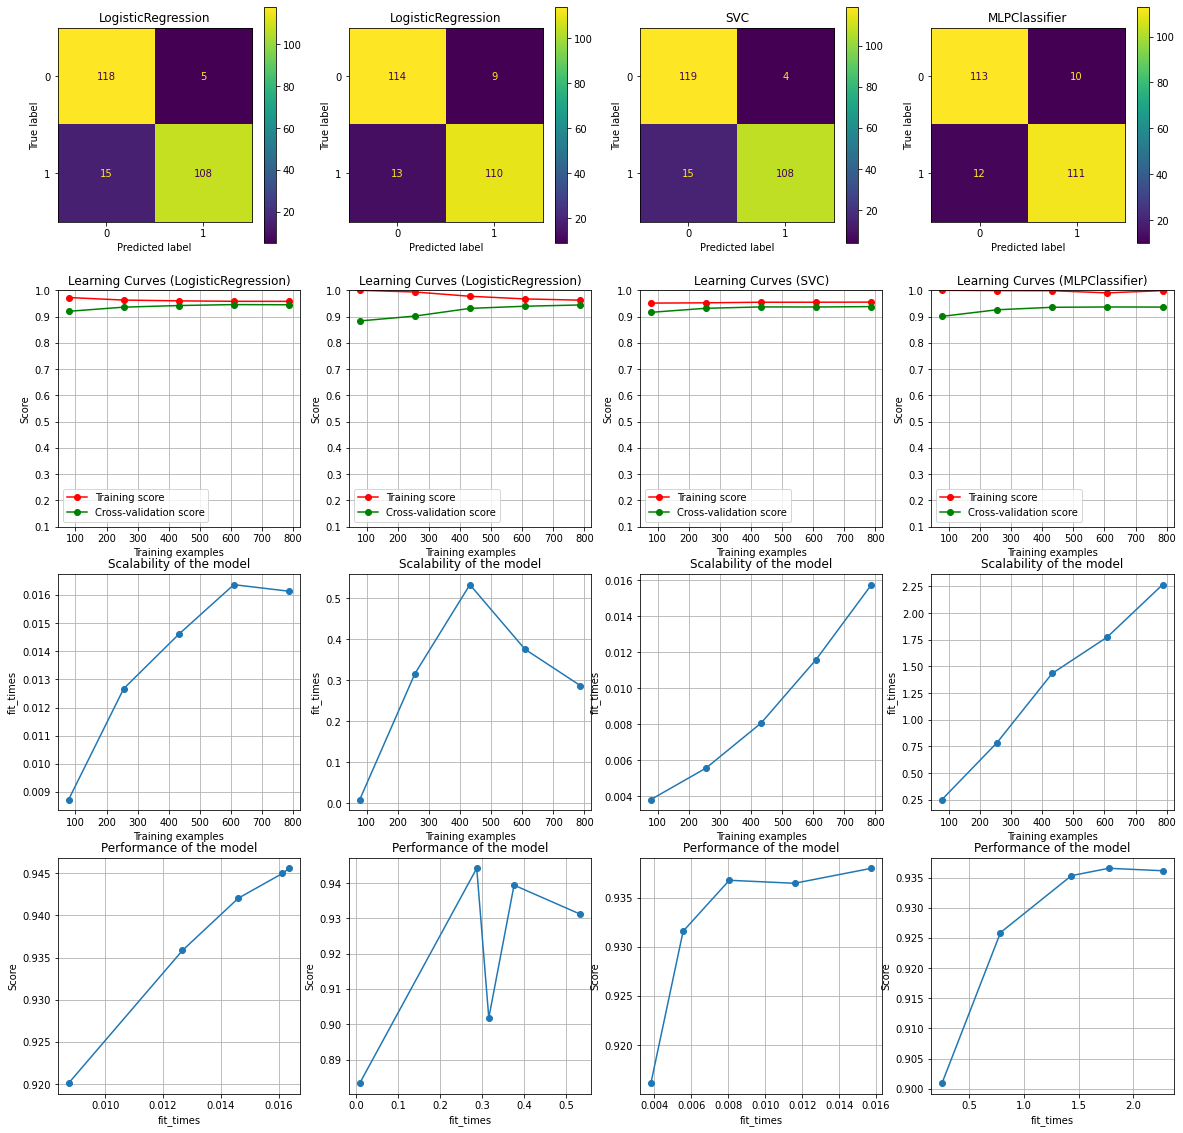

In [23]:
clfs = [LogisticRegression(max_iter=5000), LogisticRegression(penalty='none', max_iter=5000), SVC(kernel="rbf", max_iter=5000), MLPClassifier(max_iter=5000)]

compare_classifiers(clfs, X, y)

### Best Features (Our Pick)

LogisticRegression
F1 score and accuracy score for training set: 0.9457 , 0.9458.
F1 score and accuracy score for test set: 0.9265 , 0.9268.
Precision score: 0.9907.
Recall score: 0.8618.

LogisticRegression
F1 score and accuracy score for training set: 0.9471 , 0.9472.
F1 score and accuracy score for test set: 0.9225 , 0.9228.
Precision score: 0.9727.
Recall score: 0.8699.

SVC
F1 score and accuracy score for training set: 0.9416 , 0.9417.
F1 score and accuracy score for test set: 0.9264 , 0.9268.
Precision score: 1.0000.
Recall score: 0.8537.

MLPClassifier
F1 score and accuracy score for training set: 0.9485 , 0.9485.
F1 score and accuracy score for test set: 0.9225 , 0.9228.
Precision score: 0.9815.
Recall score: 0.8618.



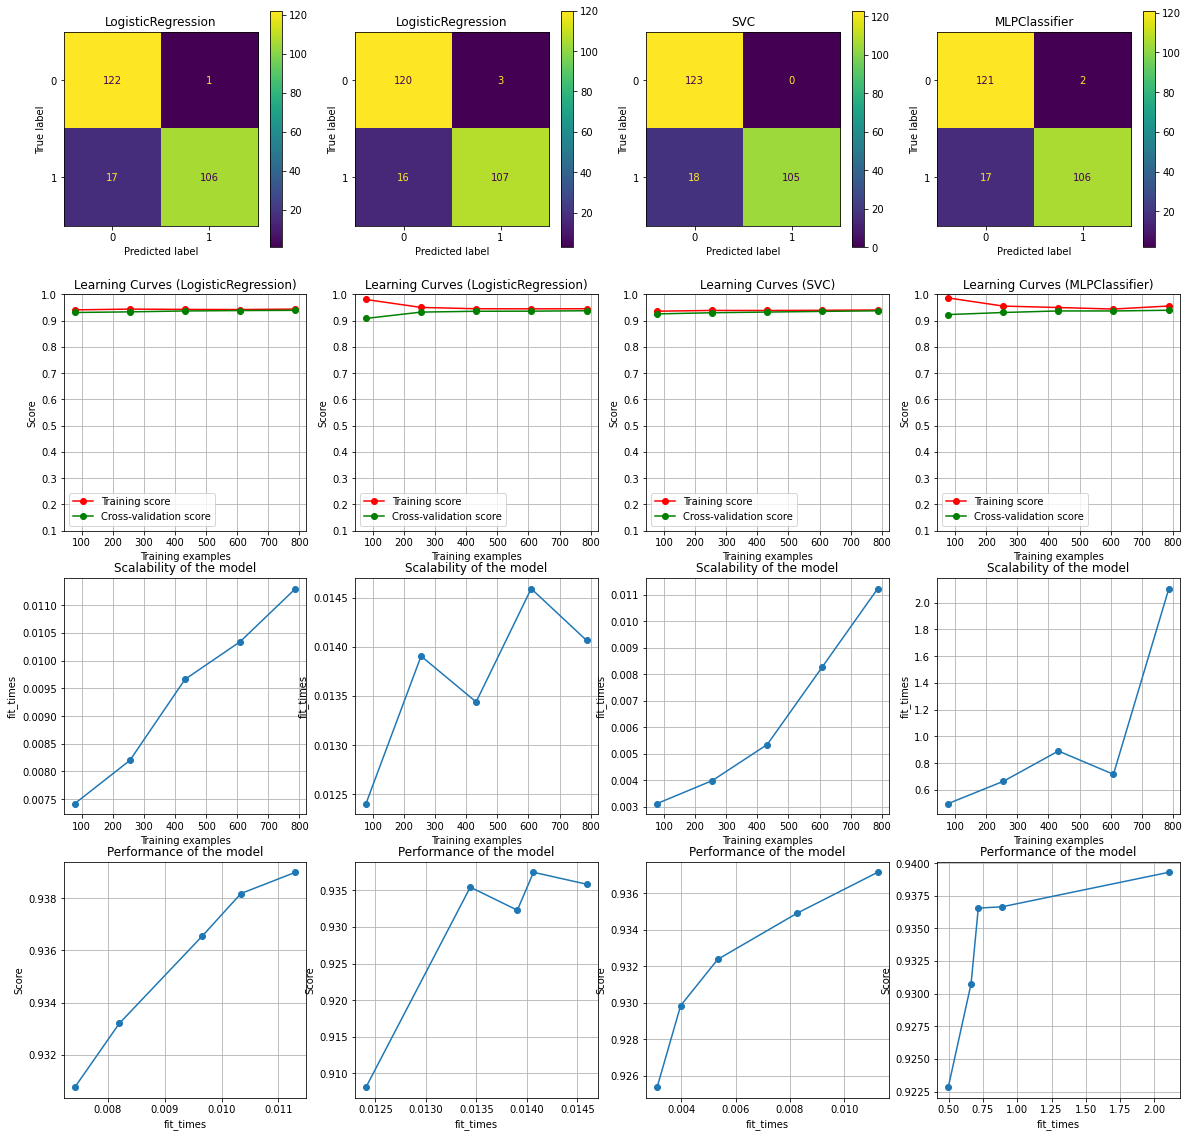

In [24]:
compare_classifiers(clfs, X[best_features], y)

### Best Features (Picked By GradientBoostingRegressor)

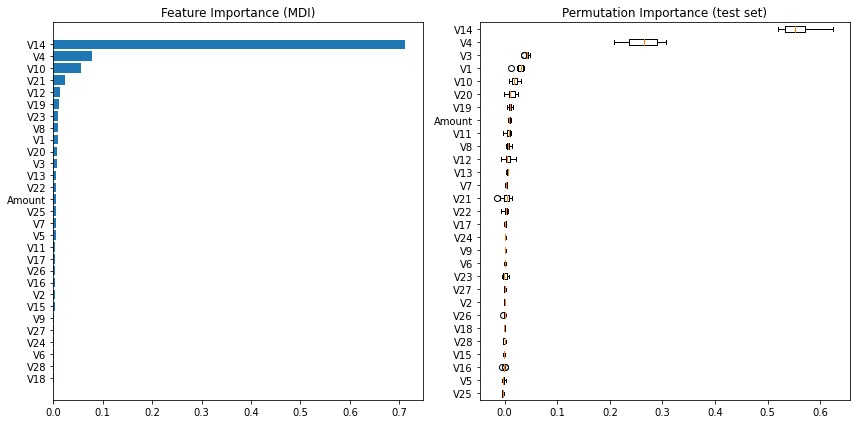

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor


params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "ls",
}

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

features = X.columns.values
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(features)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

LogisticRegression
F1 score and accuracy score for training set: 0.9157 , 0.9160.
F1 score and accuracy score for test set: 0.9307 , 0.9309.
Precision score: 0.9818.
Recall score: 0.8780.

LogisticRegression
F1 score and accuracy score for training set: 0.9157 , 0.9160.
F1 score and accuracy score for test set: 0.9430 , 0.9431.
Precision score: 0.9823.
Recall score: 0.9024.

SVC
F1 score and accuracy score for training set: 0.9127 , 0.9133.
F1 score and accuracy score for test set: 0.9347 , 0.9350.
Precision score: 0.9908.
Recall score: 0.8780.

MLPClassifier
F1 score and accuracy score for training set: 0.9157 , 0.9160.
F1 score and accuracy score for test set: 0.9348 , 0.9350.
Precision score: 0.9820.
Recall score: 0.8862.



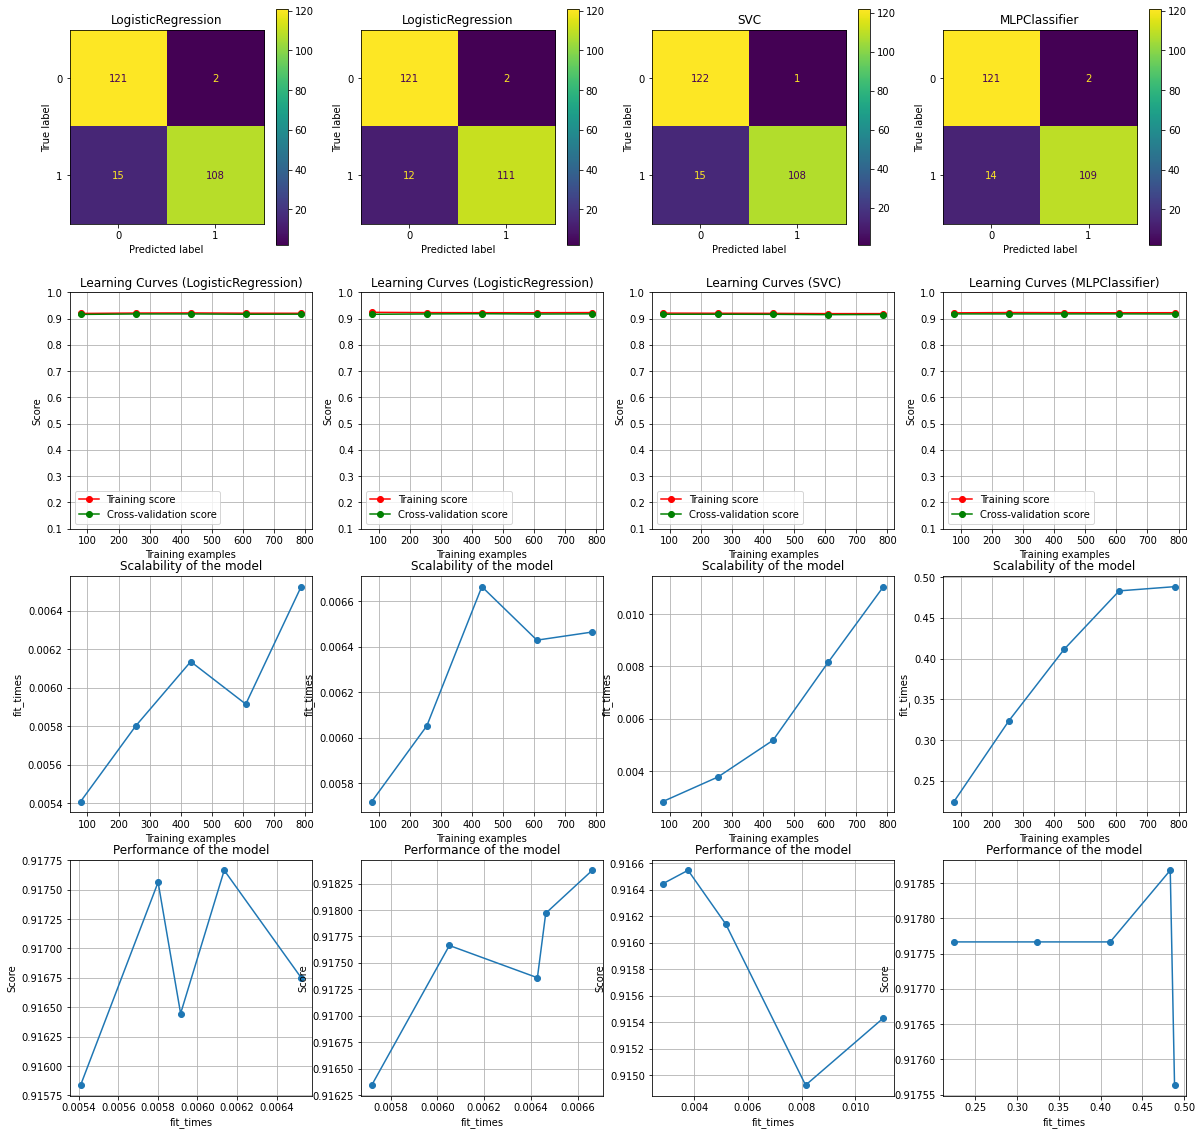

In [26]:
compare_classifiers(clfs, X[['V14']], y)

LogisticRegression
F1 score and accuracy score for training set: 0.9416 , 0.9417.
F1 score and accuracy score for test set: 0.9266 , 0.9268.
Precision score: 0.9817.
Recall score: 0.8699.

LogisticRegression
F1 score and accuracy score for training set: 0.9430 , 0.9431.
F1 score and accuracy score for test set: 0.9308 , 0.9309.
Precision score: 0.9732.
Recall score: 0.8862.

SVC
F1 score and accuracy score for training set: 0.9416 , 0.9417.
F1 score and accuracy score for test set: 0.9307 , 0.9309.
Precision score: 0.9818.
Recall score: 0.8780.

MLPClassifier
F1 score and accuracy score for training set: 0.9457 , 0.9458.
F1 score and accuracy score for test set: 0.9389 , 0.9390.
Precision score: 0.9737.
Recall score: 0.9024.



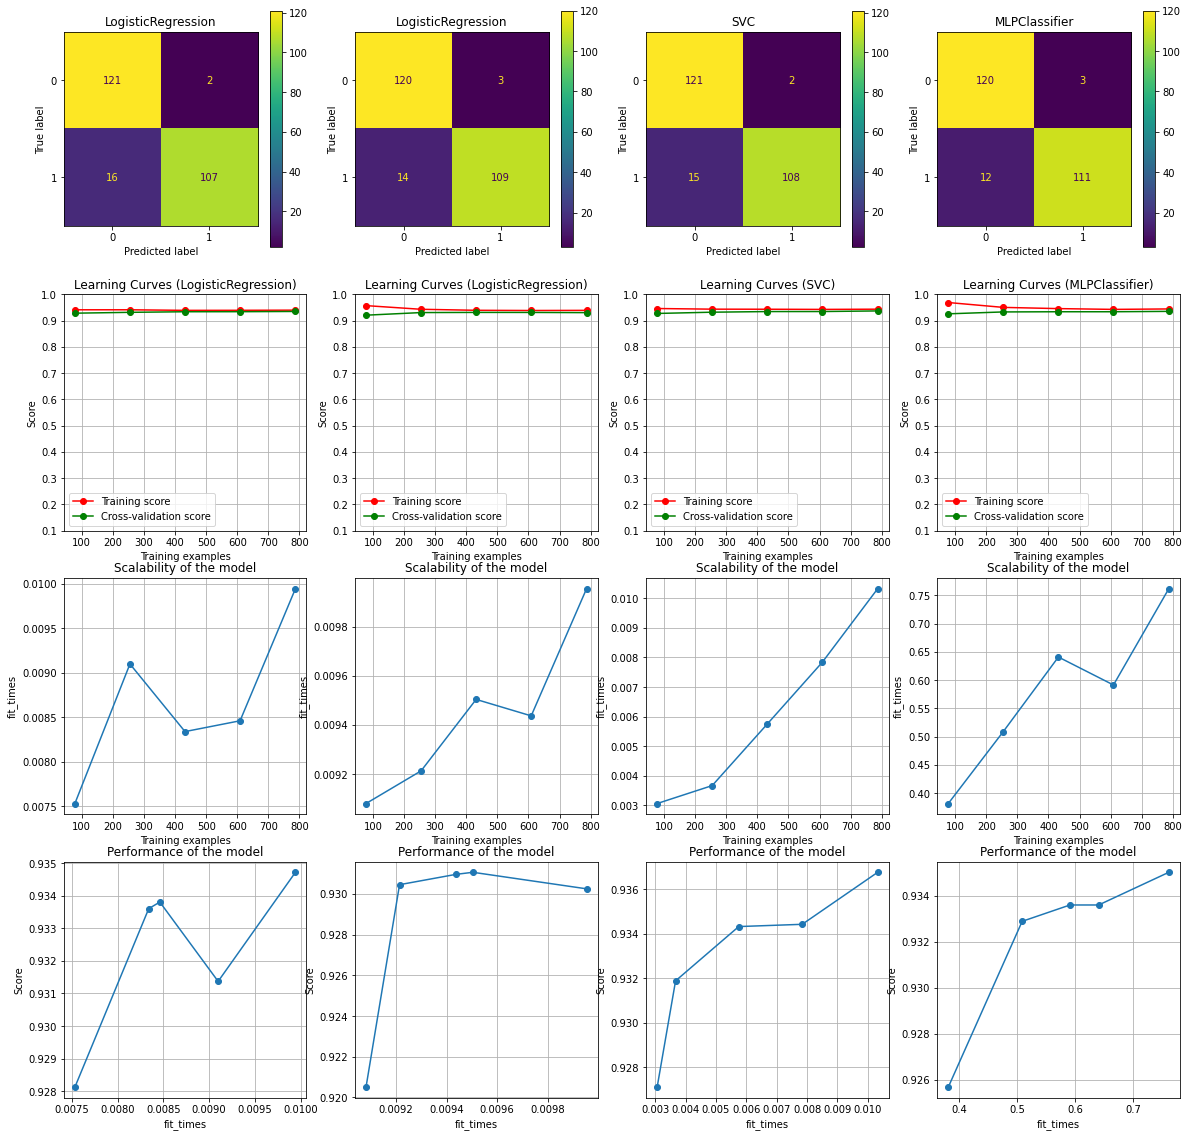

In [27]:
gradient_best_features = ['V14', 'V10', 'V4', 'V16', 'V20']
X_train, X_test, y_train, y_test = train_test_split(X[gradient_best_features], y, stratify = y)

compare_classifiers(clfs, X[gradient_best_features], y)

### Best Features (Picked By Parameter Tunning)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def parameter_tuning(X_train, X_test, y_train, y_test, model, tuned_parameters, include_grid=False):
    
    scores = ['accuracy']
    
    best_parameters = []

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            model, tuned_parameters, scoring=score
        )
        
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        best_parameters.append(clf.best_params_)
        print(clf.best_params_)
        print()
        if include_grid:
            print("Grid scores on development set:")
            print()
            means = clf.cv_results_['mean_test_score']
            stds = clf.cv_results_['std_test_score']
            for mean, std, params in zip(means, stds, clf.cv_results_['params']):
                print("%0.3f (+/-%0.03f) for %r"
                      % (mean, std * 2, params))
            print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        
    return best_parameters

In [29]:
tuned_log_parameters = [
    {
        'solver': ['lbfgs'], 
        'max_iter': [5000], 
        'C': [1, 10, 100, 1000], 
        'class_weight': ['balanced'], 
        'penalty': ['l2', 'none']
    },
    {
        'solver': ['liblinear'], 
        'max_iter': [5000],
        'C': [1, 10, 100, 1000], 
        'class_weight': ['balanced'],
        'penalty': ['l1', 'l2']
    }
]

best_log_parameters = parameter_tuning(X_train, X_test, y_train, y_test, LogisticRegression(), tuned_log_parameters)

# Tuning hyper-parameters for accuracy



/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='non

Best parameters set found on development set:
{'C': 10, 'class_weight': 'balanced', 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       123
           1       0.98      0.90      0.94       123

    accuracy                           0.94       246
   macro avg       0.95      0.94      0.94       246
weighted avg       0.95      0.94      0.94       246




In [30]:
tuned_svm_parameters = [
    {
        'C': [0.001, 0.01, 0.1, 1, 3, 10, 30, 100, 1000], 
        'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1],
        'kernel': ['rbf']
    }
]

best_svm_parameters = parameter_tuning(X_train, X_test, y_train, y_test, SVC(), tuned_svm_parameters)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:
{'C': 3, 'gamma': 1, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       123
           1       0.99      0.90      0.94       123

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246




In [31]:
tuned_nn_parameters = [
    {
        'solver': ['adam'], 
        'max_iter': [5000],
        'hidden_layer_sizes': [(12,12), (12,12,12)], 
        'activation': ['tanh', 'relu'],
        'alpha': [1e-3,1e-4], 
        'learning_rate': ['constant', 'invscaling'], 
        'learning_rate_init': [0.001, 0.01]
    }
]

best_nn_parameters = parameter_tuning(X_train, X_test, y_train, y_test, MLPClassifier(), tuned_nn_parameters)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 5000, 'solver': 'adam'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       123
           1       0.98      0.92      0.95       123

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246




LogisticRegression
F1 score and accuracy score for training set: 0.9661 , 0.9661.
F1 score and accuracy score for test set: 0.9349 , 0.9350.
Precision score: 0.9735.
Recall score: 0.8943.

SVC
F1 score and accuracy score for training set: 0.9661 , 0.9661.
F1 score and accuracy score for test set: 0.9430 , 0.9431.
Precision score: 0.9823.
Recall score: 0.9024.

MLPClassifier
F1 score and accuracy score for training set: 0.9986 , 0.9986.
F1 score and accuracy score for test set: 0.9146 , 0.9146.
Precision score: 0.9250.
Recall score: 0.9024.



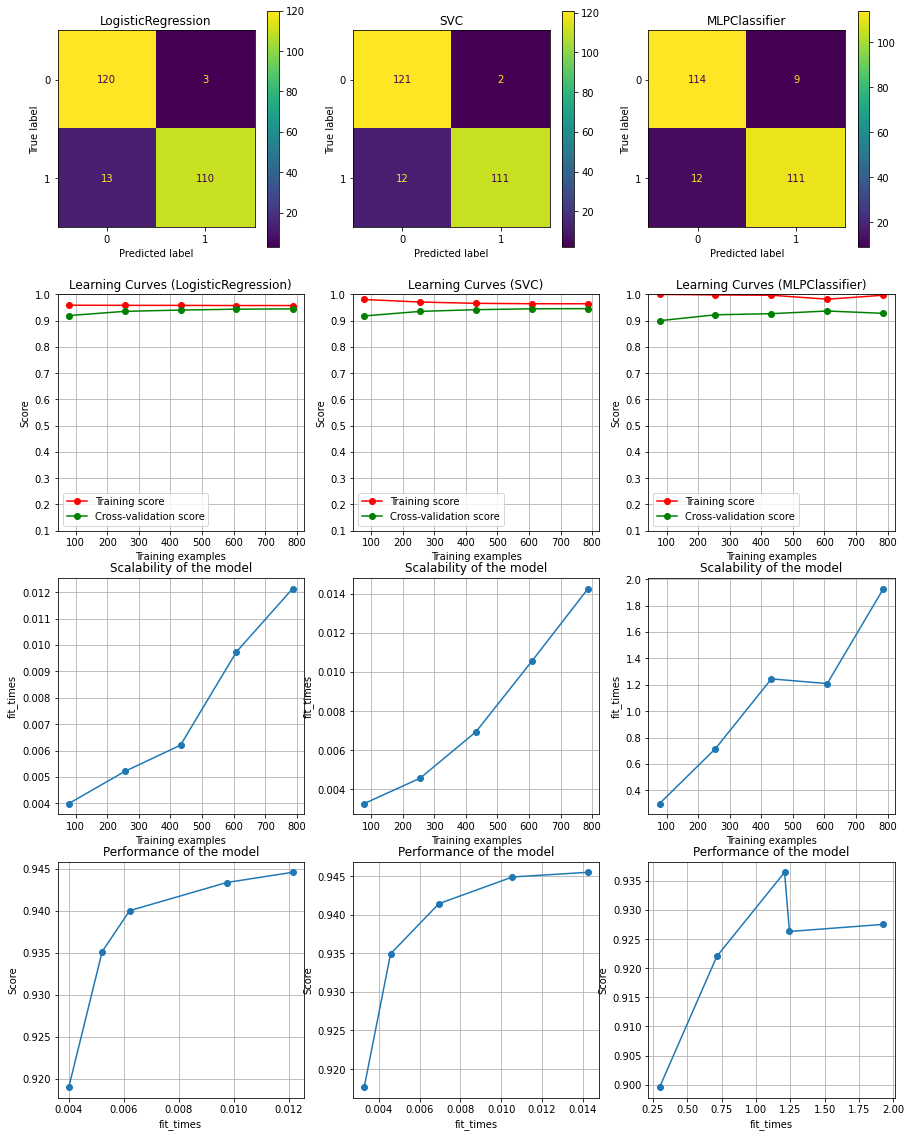

In [32]:
clfs = [
    LogisticRegression(C=1, class_weight='balanced', max_iter=5000, penalty='l1', solver='liblinear'), 
    SVC(C=100, gamma=0.003, kernel='rbf'), 
    MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(12, 12), learning_rate='constant', learning_rate_init=0.001, max_iter=5000, solver='adam')
]

compare_classifiers(clfs, X, y)

### K-Fold

In [33]:
from sklearn.model_selection import KFold, validation_curve


def kfold_test(X_train, y_train, X_test, y_test, clf, k):
    kf = KFold(n_splits=k, shuffle=True)
    
    scores = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=k, return_estimator=True)

    avg_acc_score = sum(scores['test_score'])/k

    print('Accuracy of each fold - {}'.format(scores['test_score']))
    print('Avg accuracy : {}'.format(avg_acc_score))
    
    best_estimator = scores['estimator'][np.argmax(scores['test_score'])]

    y_pred_test = best_estimator.predict(X_test)
    acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    print("Using the best estimator from CV:")
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))
    
    return y_pred_test

def basic_train_and_test(clf, X_train, X_test, y_train, y_test):

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    acc_train = sum(y_train == y_pred_train) / float(len(y_pred_train))
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1_train , acc_train))

    y_pred_test = clf.predict(X_test)
    acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))
    
    return y_pred_test

LogisticRegression
F1 score and accuracy score for training set: 0.9620 , 0.9621.
F1 score and accuracy score for test set: 0.9349 , 0.9350.
Precision score: 0.9735.
Recall score: 0.8943.

SVC
F1 score and accuracy score for training set: 0.9715 , 0.9715.
F1 score and accuracy score for test set: 0.9430 , 0.9431.
Precision score: 0.9910.
Recall score: 0.8943.

MLPClassifier
F1 score and accuracy score for training set: 0.9973 , 0.9973.
F1 score and accuracy score for test set: 0.9146 , 0.9146.
Precision score: 0.9397.
Recall score: 0.8862.

Accuracy of each fold - [0.94594595 0.95135135 0.92391304 0.89130435]
Avg accuracy : 0.9281286721504113
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.9430 , 0.9431.
Accuracy of each fold - [0.94594595 0.96216216 0.9076087  0.89673913]
Avg accuracy : 0.9281139835487662
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.9430 , 0.9431.
Accuracy of each fold - [0.94054054 0.95675676 0.94565217 0

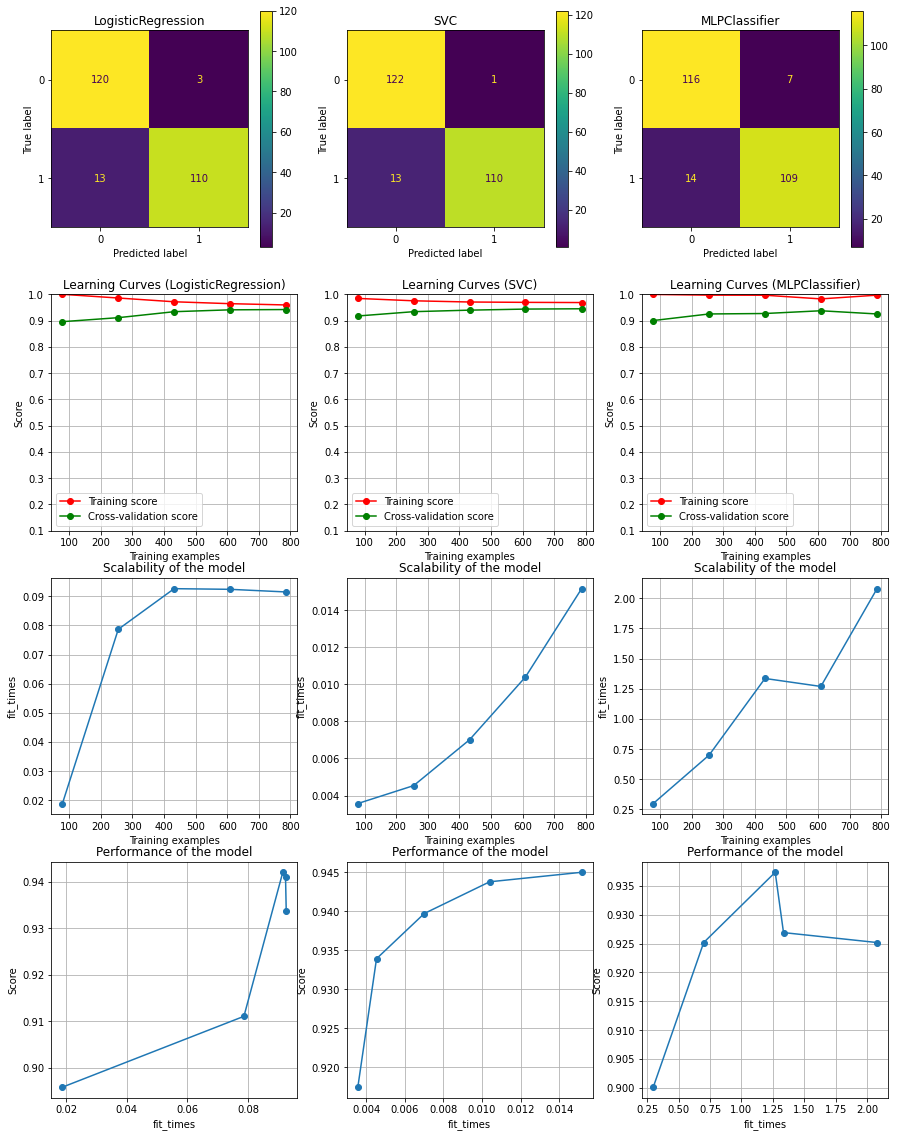

In [34]:
from sklearn.model_selection import cross_validate


clfs = [
    LogisticRegression(C= 1000, class_weight= 'balanced', max_iter=1000, penalty= 'l2', solver='lbfgs'),
    SVC(kernel="rbf", gamma=0.01, C=30), 
    MLPClassifier(solver='adam',hidden_layer_sizes=(12,12), max_iter=1000,activation='relu', alpha=0.001, learning_rate= 'invscaling',learning_rate_init=0.001,)
]

compare_classifiers(clfs, X, y)

for clf in clfs: kfold_test(X_train, y_train, X_test, y_test, clf, 4)

In [35]:
def val_curvve(clf,X,y,name,range_):
    train_scores, test_scores = validation_curve(
        clf,
        X,
        y,
        param_name=name,
        param_range=range_,
        scoring="accuracy",
        n_jobs=5,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve ")
    plt.xlabel(name)
    plt.ylabel("Score")
    plt.plot(range_,train_scores_mean,label="Training score", color="r")
    

    plt.plot(
        param_range, test_scores_mean, label="Cross-validation score", color="navy")
  
    plt.legend(loc="best")
    plt.show()

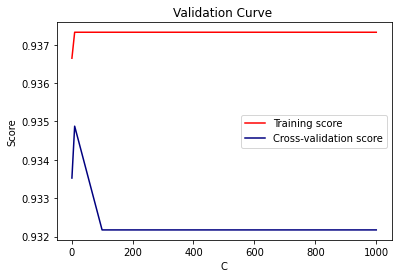

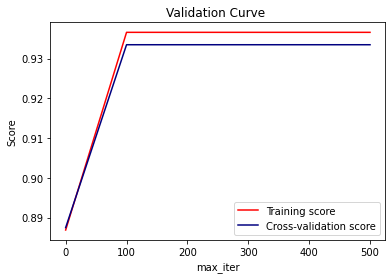

In [36]:
param_range = [1, 10, 100, 1000]
val_curvve(LogisticRegression(),X_train,y_train,"C",param_range)
param_range=[0,100, 400,500]
val_curvve(LogisticRegression(),X_train,y_train,"max_iter",param_range)

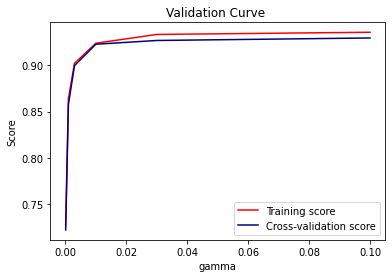

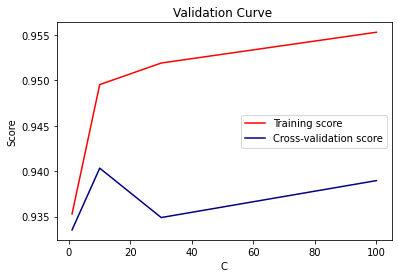

In [37]:
param_range = [0.0001,0.001, 0.003, 0.01, 0.03, 0.1]

val_curvve(SVC(),X_train,y_train,"gamma",param_range)
param_range = [1,10,30,100]

val_curvve(SVC(),X_train,y_train,"C",param_range)

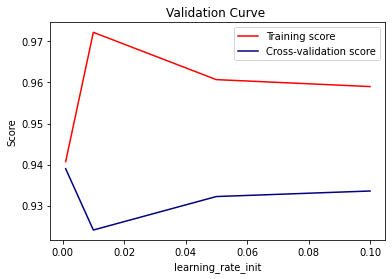

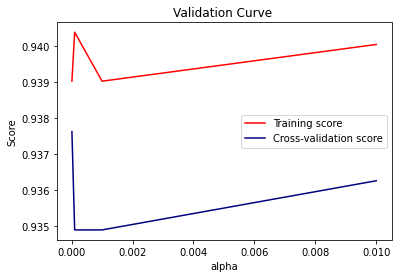

In [38]:
param_range = [0.001, 0.01,0.05,0.1]

val_curvve(MLPClassifier(max_iter=1000),X_train,y_train,"learning_rate_init",param_range)
param_range = [1e-2,1e-3,1e-4,1e-5]
val_curvve(MLPClassifier(max_iter=1000),X_train,y_train,"alpha",param_range)

F1 score and accuracy score for test set: 0.9996 , 0.9996.
Precision score: 0.9657.
Recall score: 0.8008.


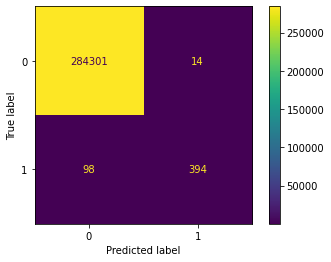

In [40]:
original = pd.read_csv("creditcard.csv")

X_original = original[feature_columns]
X_original = StandardScaler().fit(X_original).transform(X_original)
X_original = pd.DataFrame(X_original, columns = feature_columns)[best_features]

original = pd.concat([X_original, original[label_column]], axis=1)

y_original = original['Class']

X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, stratify = y_original)

clfs[1].fit(X_original, y_original)

y_pred_test = clfs[1].predict(X_original)
acc_test = sum(y_original == y_pred_test) / float(len(y_pred_test))
f1_test = f1_score(y_original, y_pred_test, average='weighted')

print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))

print("Precision score: {:.4f}.".format(precision_score(y_original, y_pred_test)))
print("Recall score: {:.4f}.".format(recall_score(y_original, y_pred_test)))

plot_confusion_matrix(clfs[1], X_original, y_original)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

reg = LogisticRegression(penalty='none', max_iter=5000)
reg.fit(X_train, y_train)

features = X.columns.values
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(features)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'